ChEn-3170: Computational Methods in Chemical Engineering Fall 2021 UMass Lowell; Prof. V. F. de Almeida **07Sep21**

# 03. Arrays
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Dmtrx}{\boldsymbol{\mathsf{D}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents<a id="toc">
* [Objectives](#obj)
* [Introduction](#introduction)
    
    
* [NumPy Package](#numpy)
 - [1-D (vector)](#1d)
    + [Magnitude](#vecmag)
    + [Important: shared data](#nb)
 - [2-D (matrix)](#2d)
   + [Visualization](#plot)
 - [3-D (brick or block or cube)](#3d)
   + [Color image as a 3D Brick (RGB)](#image)
    
    
* [Exercising Array Slicing (or Views)](#views)
 - [Regular Sampling (Filtering)](#regularsampling)
 - [Irregular Sampling (Filtering)](#irregularsampling)
    
    
* [Notable Vectors](#notablevec)
    
    
* [Notable Matrices](#notablemtrx)
 - [Zero matrix](#zeromtrx)
 - [All ones matrix](#onesmtrx)
 - [Any constant matrix](#ctemtrx)
 - [Empty matrix](#emptymtrx)
 - [$\Imtrx$: Identity matrix](#identitymtrx)   
 - [$\Lmtrx$: Lower triangular matrix](#lmtrx)
 - [$\Umtrx$: Upper triangular matrix](#umtrx)
------

## [Objectives](#toc)<a id="obj"></a>

 + Expand on data structures convered so far to include multidimensional arrays for scientific computing.
 + Cover essential elements of data layout for scientific computing.
 + Experiment with views/slices of arrays using visualization (Matplotlib).

## [Introduction](#toc)<a id="introduction"></a>
Arrays are containers of data in a structured form, *i.e.* in a *block* layout. This course uses the n-dimensional array Python package:
+ [NumPy](http://www.numpy.org/): `ndarray` (n-dimensional or multi-dimensional array).
+ [Quick-start tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html):
we need to import `numpy` into the Python interpreter.

## [NumPy Package](#toc)<a id="numpy"></a>
All packages in Python are imported into your session using the `import` *statement*.

In [1]:
'''Python packages are accessed with an import directive as such:'''

import numpy as np  # import the package and create the alias: np

### [One-dimensional array (or vector)](#toc)<a id="1d"></a>
A one-dimensional array or **vector** is an ordered sequence of data types.

In [2]:
'''Loading data into "ndarray" using built-in Python data types and the "np.array()" method'''

pylist = [4.5, 8, 90, 1e2, 2.3e-5]   # create a native Python list

mass_cc = np.array(pylist)  # array() takes a list and converts it into a ndarray

print('mass_cc type =', type(mass_cc))
print('mass_cc length =', mass_cc.size)        # check size with help(np.size)
print('mass_cc shape =', mass_cc.shape) 
print('mass_cc =', mass_cc)
print('mass_cc entry dtype =', mass_cc.dtype)  # check type with help(np.dtype)

mass_cc type = <class 'numpy.ndarray'>
mass_cc length = 5
mass_cc shape = (5,)
mass_cc = [4.5e+00 8.0e+00 9.0e+01 1.0e+02 2.3e-05]
mass_cc entry dtype = float64


In [3]:
#help(np.array)

In [4]:
'''NumPy has a very rich set of algebraic operations on arrays; a few examples'''

print('mass_cc       =',mass_cc)
print('2.0 * mass_cc = ', 2 * mass_cc)
print('2.0 / mass_cc = ', 2 / mass_cc)
print('mass_cc**2    = ', mass_cc**2)

mass_cc       = [4.5e+00 8.0e+00 9.0e+01 1.0e+02 2.3e-05]
2.0 * mass_cc =  [9.0e+00 1.6e+01 1.8e+02 2.0e+02 4.6e-05]
2.0 / mass_cc =  [4.44444444e-01 2.50000000e-01 2.22222222e-02 2.00000000e-02
 8.69565217e+04]
mass_cc**2    =  [2.025e+01 6.400e+01 8.100e+03 1.000e+04 5.290e-10]


In [5]:
'''NumPy has a very rich set of algebraic operations on arrays; a few examples'''

print('mass_cc - mass_cc =', mass_cc - mass_cc)

mass_cc_new = np.random.random(5) # a quick way to populate a vector with 0->1 random numbers

print('mass_cc + mass_cc_new =', mass_cc + mass_cc_new)

mass_cc - mass_cc = [0. 0. 0. 0. 0.]
mass_cc + mass_cc_new = [  5.36139061   8.01708046  90.69186113 100.64582801   0.73802064]


In [6]:
'''NumPy has a very rich set of algebraic operations on arrays; a few examples'''

print('np.log(mass_cc) = ', np.log(mass_cc))

np.log(mass_cc) =  [  1.5040774    2.07944154   4.49980967   4.60517019 -10.68001634]


In [7]:
'''NumPy has a very rich set of algebraic operations on arrays; a few examples'''

print('mass_cc       = ',mass_cc)
print('mean(mass_cc) = ', np.mean(mass_cc))
print('var(mass_cc)  = ', np.var(mass_cc))
print('std(mass_cc)  = ', np.std(mass_cc))
print('sum(mass_cc)  = ', np.sum(mass_cc))

mass_cc       =  [4.5e+00 8.0e+00 9.0e+01 1.0e+02 2.3e-05]
mean(mass_cc) =  40.5000046
var(mass_cc)  =  1996.5996274000845
std(mass_cc)  =  44.68332605570096
sum(mass_cc)  =  202.500023


In [8]:
'''Loading data into "ndarray" using built-in Python data types and the "np.array()" method'''

# NOT to be used in this course

species_set = {'water', 'argon', 'O2', 'N2'}

species = np.array(species_set)  

print('species type =', type(species))
print('***species length*** =', species.size)
print('species =', species)
print('***species entry dtype*** =', species.dtype)

species type = <class 'numpy.ndarray'>
***species length*** = 1
species = {'water', 'N2', 'O2', 'argon'}
***species entry dtype*** = object


In [9]:
'''Build an ndarray with the workhorse "np.linspace()" method'''

moles_vec = np.linspace(1e-3, 3.45, 6)         # linspace() is a method of numpy

print('moles_vec type =', type(moles_vec))        # type introspection in python
print('moles_vec length =', moles_vec.size)       # vector length or size
print('moles_vec =', moles_vec)
print('moles_vec entry dtype =', moles_vec.dtype) # inquire about the internal data type in numpy

moles_vec type = <class 'numpy.ndarray'>
moles_vec length = 6
moles_vec = [1.0000e-03 6.9080e-01 1.3806e+00 2.0704e+00 2.7602e+00 3.4500e+00]
moles_vec entry dtype = float64


In [10]:
#help(np.linspace)  # help for linspace()

In [11]:
'''Now create a mole fraction data array'''

total_n_moles = moles_vec.sum()            # "sum()" method adds all elements in "moles_vec"
moles_frac = moles_vec / total_n_moles     # operation: the "mole_vec" array is divided by the "total_n_moles"
print('')
print('moles_frac =', moles_frac)
print('sum        =', moles_frac.sum())   # using sum method of moles_frac


moles_frac = [9.65903603e-05 6.67246209e-02 1.33352651e-01 1.99980682e-01
 2.66608712e-01 3.33236743e-01]
sum        = 1.0


In [12]:
#dir(moles_vec)   # list of methods and attributes available for the `moles_vec` object

In [13]:
#help(moles_vec.sum)  # help for the sum method of `moles_vec` or `ndarray`

In [14]:
#help(np.sum)  # help for the build-in function in `numpy`

In [15]:
print('sum =', np.sum(moles_frac)) # another way to sum using numpy built-in function np.sum()

sum = 1.0


In [16]:
'''Accessing "ndarray" data with the indexing operator []'''

print('moles_frac    =\n', moles_frac,'\n')
print('moles_frac[0] =', moles_frac[0])   # access the offset 0 item
print('moles_frac[4] =', moles_frac[4])   # access the offset 4 item

'''Accessing slices'''

print('')
print('moles_frac[3:6] =', moles_frac[3:6])   # print from index 3 to index 6-1

moles_frac    =
 [9.65903603e-05 6.67246209e-02 1.33352651e-01 1.99980682e-01
 2.66608712e-01 3.33236743e-01] 

moles_frac[0] = 9.659036028204384e-05
moles_frac[4] = 0.26660871245049744

moles_frac[3:6] = [0.19998068 0.26660871 0.33323674]


In [17]:
'''Accessing "ndarray" data with the indexing operator []'''

'''Modify slice data'''

moles_frac[3:6] *= 3.2                              # modify the slice by multiplying in-place by 3.2
print('moles_frac[3:6] * 3.2 =', moles_frac[3:6])    # print result

# same as this
#tmp = mole_frac[3:6] * 3.2
#mole_frac[3:6] = tmp

moles_frac[3:6] * 3.2 = [0.63993818 0.85314788 1.06635758]


#### [Vector Magnitude](#toc)<a id="vecmag"></a>

In [18]:
'''Vector magnitude'''

'''one way'''
tmp = moles_frac * moles_frac              # element-by-element multiplication of the vector
print('tmp =\n',tmp,'\n')

mag = np.sqrt(tmp.sum())               # sum of all elements in tmp and take the sqrt
print('magnitude of mole_frac = ', mag)

tmp =
 [9.32969770e-09 4.45217503e-03 1.77829296e-02 4.09520877e-01
 7.27861305e-01 1.13711848e+00] 

magnitude of mole_frac =  1.5154985249072437


In [19]:
'''Vector magnitude another way'''

mag = np.sqrt(np.dot(moles_frac, moles_frac))  # use the inner product

print('magnitude of mole_frac = ', mag)

magnitude of mole_frac =  1.5154985249072437


<a id="nb"></a>
<div class="alert alert-block alert-danger">
NB: Shared data concept in vectors extend to all arrays.
</div>

In [20]:
'''Vector View (Shared Data)'''

a_vec = np.random.random(6)  # useful of obtaining random data (0.0 to 1.0)     
print('a_vec =', a_vec)

b_vec = a_vec           # this is a "view" or alias of the entire a_vec

b_vec[1] = 0.0          # this will change a_vec too
print('b_vec =', b_vec)

a_vec = [0.5596524  0.76666107 0.91562012 0.58790321 0.38055721 0.48254746]
b_vec = [0.5596524  0.         0.91562012 0.58790321 0.38055721 0.48254746]


In [21]:
print('a_vec =', a_vec)

a_vec = [0.5596524  0.         0.91562012 0.58790321 0.38055721 0.48254746]


In [22]:
'''Vector View (Shared Data)'''

a_vec = np.random.random(6)       
print('a_vec =', a_vec)

print('')
b_vec = a_vec[3:]      # this is a view of a_vec data; not a copy
print('b_vec =', b_vec)

b_vec[:] = 0            # setting all elements of b_vec to zero
print('b_vec =', b_vec)

print('a_vec =', a_vec) # a_vec is also changed; shared data

a_vec = [0.73951475 0.79799368 0.98420012 0.13691487 0.56862694 0.75678579]

b_vec = [0.13691487 0.56862694 0.75678579]
b_vec = [0. 0. 0.]
a_vec = [0.73951475 0.79799368 0.98420012 0.         0.         0.        ]


In [23]:
'''Vector View (Shared Data)'''

b_vec = 1              # this assigns a new object to b_vec
print('b_vec =', b_vec)

print('a_vec =', a_vec) # note a_vec is left as before b_vec reassigned

b_vec = 1
a_vec = [0.73951475 0.79799368 0.98420012 0.         0.         0.        ]


**If you intend to use a copy of the data, use the `np.copy()` method**

In [24]:
'''Vector Copy'''

a_vec = np.random.random(8)
print('a_vec =', a_vec)

b_vec = np.copy(a_vec)      # this is an independent copy of a_vec

b_vec[0] = 0.0              # this will only change b_vec
print('b_vec =', b_vec)

print('')
print('a_vec =', a_vec)

a_vec = [0.07929506 0.26910793 0.92536027 0.31508377 0.48531859 0.94129726
 0.02491382 0.40564884]
b_vec = [0.         0.26910793 0.92536027 0.31508377 0.48531859 0.94129726
 0.02491382 0.40564884]

a_vec = [0.07929506 0.26910793 0.92536027 0.31508377 0.48531859 0.94129726
 0.02491382 0.40564884]


### [Two-dimensional array (or matrix)](#toc)<a id="2d"></a>
A two-dimensional array or matrix, is a collection of data types ordered into rows and columns.

In [25]:
'''Using "array()" to create a 2-D "np.ndarray"'''

# create a native Python list of lists 

data = [ [4.5, 8  , 90, 1e12, 2.3e-5, -8  ],    # note line continuation
         [0  , 3.1, 10, 3000, 0.1234, -1.2],
         [3  , 5.9, 40, 1e-2, 2.3301, 78  ]
       ]

mass_cc = np.array(data)   # use the np.array( ) method to create the array

print('mass_cc type =', type(mass_cc))
print('mass_cc length =', mass_cc.size)        # check size with help(np.size)
print('mass_cc shape =', mass_cc.shape)        # check shape with help(np.shape)
print('mass_cc =\n', mass_cc)
print('mass_cc entry dtype =', mass_cc.dtype)  # check type with help(np.dtype)

mass_cc type = <class 'numpy.ndarray'>
mass_cc length = 18
mass_cc shape = (3, 6)
mass_cc =
 [[ 4.5000e+00  8.0000e+00  9.0000e+01  1.0000e+12  2.3000e-05 -8.0000e+00]
 [ 0.0000e+00  3.1000e+00  1.0000e+01  3.0000e+03  1.2340e-01 -1.2000e+00]
 [ 3.0000e+00  5.9000e+00  4.0000e+01  1.0000e-02  2.3301e+00  7.8000e+01]]
mass_cc entry dtype = float64


In [26]:
'''Not a matrix'''

data = [ [4.5,   8, 90, 1e12, 2.3e-5,   -8     ],   # note line continuation
         [0  , 3.1, 10, 3000, 0.1234, -1.2, 7.8],   # note extra element in this row; could be unintentional
         [3  , 5.9, 40, 1e-2, 2.3301,   78     ]
       ]

not_mtrx = np.array(data)

print('not_mtrx type =',type(not_mtrx))
print('not_mtrx length =',not_mtrx.size)        # check size with help(np.size)
print('not_mtrx shape =',not_mtrx.shape)        # check shape with help(np.shape)
print('not_mtrx =\n',not_mtrx)
print('not_mtrx entry dtype =',not_mtrx.dtype)  # check type with help(np.dtype)

not_mtrx type = <class 'numpy.ndarray'>
not_mtrx length = 3
not_mtrx shape = (3,)
not_mtrx =
 [list([4.5, 8, 90, 1000000000000.0, 2.3e-05, -8])
 list([0, 3.1, 10, 3000, 0.1234, -1.2, 7.8])
 list([3, 5.9, 40, 0.01, 2.3301, 78])]
not_mtrx entry dtype = object


<ipython-input-26-cc4d082a828d>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  not_mtrx = np.array(data)


In [27]:
'''Access elements of the 2-D array; use double indexing, e.g., name[i,j]'''
# i -> row index
# j -> column index

print('mass_cc[0,0] =', mass_cc[0,0])   # single element on with index 0,0
print('mass_cc[1,1] =', mass_cc[1,1])   # single element on with index 1,1

print(mass_cc)

mass_cc[0,0] = 4.5
mass_cc[1,1] = 3.1
[[ 4.5000e+00  8.0000e+00  9.0000e+01  1.0000e+12  2.3000e-05 -8.0000e+00]
 [ 0.0000e+00  3.1000e+00  1.0000e+01  3.0000e+03  1.2340e-01 -1.2000e+00]
 [ 3.0000e+00  5.9000e+00  4.0000e+01  1.0000e-02  2.3301e+00  7.8000e+01]]


In [28]:
'''More on using "array()" to create a 2-D "np.ndarray"'''

# create a native Python list of 5-element objects 
data = [ np.linspace(1,5,5),         # first row   5 elements
         range(5),                   # second row  5 elements
         np.random.random(5)*3.0     # third row   5 elements  
       ]

mass_cc = np.array(data)  # mass concentration is non-negative

print('mass_cc type =',type(mass_cc))
print('mass_cc shape =',mass_cc.shape)        # check shape with help(np.shape)
print('mass_cc length =',mass_cc.size)        # check size with help(np.size)
print('mass_cc =\n',mass_cc)
print('mass_cc entry dtype =',mass_cc.dtype)  # check type with help(np.dtype)

mass_cc type = <class 'numpy.ndarray'>
mass_cc shape = (3, 5)
mass_cc length = 15
mass_cc =
 [[1.         2.         3.         4.         5.        ]
 [0.         1.         2.         3.         4.        ]
 [2.10234772 1.12893786 0.07928002 0.36921093 1.67868196]]
mass_cc entry dtype = float64


In [29]:
'''Views of the 2-D array'''

print('mass_cc "1st" row =',mass_cc[0,:])  # use the colon operator inside the indexing operator
print('mass_cc "2nd" row =',mass_cc[1,:])  # use the colon operator inside the indexing operator
print('mass_cc "3nd" row =',mass_cc[2,:])  # use the colon operator inside the indexing operator
print('')
print('mass_cc "1st" column =',mass_cc[:,0])  # use the colon operator inside the indexing operator
print('mass_cc "2nd" column =',mass_cc[:,1])  # use the colon operator inside the indexing operator
print('mass_cc "3rd" column =',mass_cc[:,2])  # use the colon operator inside the indexing operator
print('mass_cc "4th" column =',mass_cc[:,3])  # use the colon operator inside the indexing operator
print('mass_cc "5th" column =',mass_cc[:,4])  # use the colon operator inside the indexing operator
print('')
print(mass_cc)

mass_cc "1st" row = [1. 2. 3. 4. 5.]
mass_cc "2nd" row = [0. 1. 2. 3. 4.]
mass_cc "3nd" row = [2.10234772 1.12893786 0.07928002 0.36921093 1.67868196]

mass_cc "1st" column = [1.         0.         2.10234772]
mass_cc "2nd" column = [2.         1.         1.12893786]
mass_cc "3rd" column = [3.         2.         0.07928002]
mass_cc "4th" column = [4.         3.         0.36921093]
mass_cc "5th" column = [5.         4.         1.67868196]

[[1.         2.         3.         4.         5.        ]
 [0.         1.         2.         3.         4.        ]
 [2.10234772 1.12893786 0.07928002 0.36921093 1.67868196]]


#### Visualization of matrices with [Matplotlib](https://matplotlib.org/index.html)<a id="plot"></a>

All packages in Python are imported into your session using the `import` *statement*.
<div class="alert alert-block alert-info">
Plotting for the most part will use the Python package `Matplotlib`.
</div>

In [30]:
'''Example: visualize a matrix as image'''

'''scale the matrix to 0-1'''
#tmp = mass_cc / mass_cc.max()    # element by element division
#mass_cc = tmp                    # reassigment

mass_cc /= mass_cc.max()          # scaling on the fly; same as previous two

'''scale the matrix to 0-255'''
mass_cc *= 255

print(mass_cc)

[[ 51.         102.         153.         204.         255.        ]
 [  0.          51.         102.         153.         204.        ]
 [107.21973361  57.5758307    4.04328096  18.82975761  85.61277978]]


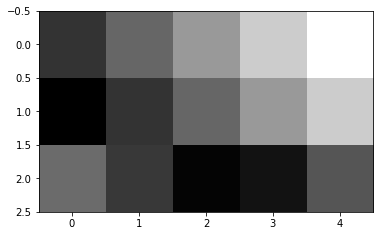

In [32]:
'''Visualize the matrix'''

from matplotlib import pyplot as plt  # import the pyplot function of the matplotlib package
#%matplotlib inline

plt.figure(1)    # create a figure placeholder

# show data as an image (as opposed to a plot)
plt.imshow(mass_cc, cmap='gray') # method call with arguments: mass_cc, a "named" argument cmap

plt.show()

In [33]:
print('mass_cc upper left quadrant =\n', mass_cc[0:2,0:2])

mass_cc upper left quadrant =
 [[ 51. 102.]
 [  0.  51.]]


In [34]:
print('mass_cc upper right quadrant =\n', mass_cc[0:2,-2:])

mass_cc upper right quadrant =
 [[204. 255.]
 [153. 204.]]


In [35]:
'''Zeros matrix'''

mass_cc = np.zeros( (4,3) )     # 4x3 matrix with zeros
print('zero matrix (4,3) =\n',mass_cc)

zero matrix (4,3) =
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [36]:
'''Identity matrix: I ("square"; i.e.: m x m; m rows and m columns)'''

mass_cc = np.eye(4,4)
print('identity matrix (4,4) =\n',mass_cc)

identity matrix (4,4) =
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [37]:
'''Diagonal matrix (square; m x m, m rows and m columns)'''

mass_cc = np.diag( range(7) )    # provide the diagonal as a vector
print('diagonal (7x7) =\n',mass_cc)

diagonal (7x7) =
 [[0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 4 0 0]
 [0 0 0 0 0 5 0]
 [0 0 0 0 0 0 6]]


In [38]:
'''Extract the diagonal of a matrix (square; m x m, m rows and m columns)'''

print('diagonal = ', np.diagonal(mass_cc)) # np diagonal method
print('diagonal = ', mass_cc.diagonal())   # matrix diagonal method

diagonal =  [0 1 2 3 4 5 6]
diagonal =  [0 1 2 3 4 5 6]


In [39]:
#help(np.diagonal)

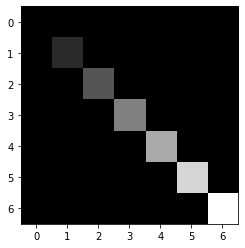

In [41]:
'''Visualize a matrix as image'''
from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
#%matplotlib inline

plt.figure(2)                      # create a figure placeholder

plt.imshow(mass_cc, cmap='gray') # show image data

plt.show()

### [Three-dimensional array (brick or block or cube)](#toc)<a id="3d"></a>

In [42]:
'''Using "array()" to create a 3-D "np.ndarray"'''

# create a native Python list of lists of lists

data = [
        [ [4.5,   8, 90, 1e12, 2.3e-5],    # 1st matrix
          [0  , 3.1, 10, 3000, 0.1234]
        ],
        [ [2.1,   -7, 31, 2e12, 0.22],     # second matrix
          [  0,  1.1, 21, 3876, 1024]
        ],
        [ [1,   -7,  4,    0, 0.22],     # third matrix
          [0,  1.1, 21, -3e4, -234]
        ]
       ]

mass_cc = np.array(data)                      # create the ndarray

print('mass_cc type =',type(mass_cc))
print('mass_cc size =',mass_cc.size)        # check size with help(np.size)
print('mass_cc shape =',mass_cc.shape)        # check shape with help(np.shape)
print('mass_cc =\n',mass_cc)
print('mass_cc entry dtype =',mass_cc.dtype)  # check type with help(np.dtype)

mass_cc type = <class 'numpy.ndarray'>
mass_cc size = 30
mass_cc shape = (3, 2, 5)
mass_cc =
 [[[ 4.500e+00  8.000e+00  9.000e+01  1.000e+12  2.300e-05]
  [ 0.000e+00  3.100e+00  1.000e+01  3.000e+03  1.234e-01]]

 [[ 2.100e+00 -7.000e+00  3.100e+01  2.000e+12  2.200e-01]
  [ 0.000e+00  1.100e+00  2.100e+01  3.876e+03  1.024e+03]]

 [[ 1.000e+00 -7.000e+00  4.000e+00  0.000e+00  2.200e-01]
  [ 0.000e+00  1.100e+00  2.100e+01 -3.000e+04 -2.340e+02]]]
mass_cc entry dtype = float64


In [43]:
'''Access elements of the 3-D array; use triple indexing, e.g., variable_name[k,i,j]'''
# k -> depth index (stacking)
# i -> row index
# j -> column index

print('mass_cc[0,0,0] =',mass_cc[0,0,0])
print('mass_cc[2,1,4] =',mass_cc[2,1,4])

mass_cc[0,0,0] = 4.5
mass_cc[2,1,4] = -234.0


In [44]:
'''Views of the 3-D array'''

print('mass_cc "1st" stack =\n',mass_cc[0,:,:],'\n') # use the colon operator inside the indexing operator

print('mass_cc "2nd" stack =\n',mass_cc[1,:,:],'\n') # use the colon operator inside the indexing operator

print('mass_cc "3rd" stack =\n',mass_cc[2,:,:],'\n') # use the colon operator inside the indexing operator

mass_cc "1st" stack =
 [[4.500e+00 8.000e+00 9.000e+01 1.000e+12 2.300e-05]
 [0.000e+00 3.100e+00 1.000e+01 3.000e+03 1.234e-01]] 

mass_cc "2nd" stack =
 [[ 2.100e+00 -7.000e+00  3.100e+01  2.000e+12  2.200e-01]
 [ 0.000e+00  1.100e+00  2.100e+01  3.876e+03  1.024e+03]] 

mass_cc "3rd" stack =
 [[ 1.00e+00 -7.00e+00  4.00e+00  0.00e+00  2.20e-01]
 [ 0.00e+00  1.10e+00  2.10e+01 -3.00e+04 -2.34e+02]] 



In [45]:
'''3D Array of Random Numbers'''

# Say this is the result of an experiment measuring mass concentrations for multiple cases
mass_cc = np.random.random((4,5,6)) # random number generator in NumPy; pass only one argument; say tuple or list

mass_cc *= 255
mass_cc = mass_cc.astype(int)  # assign int data type

print('mass_cc =\n', mass_cc)
print('mass_cc shape =', mass_cc.shape)
print('mass_cc type =',mass_cc.dtype) 

mass_cc =
 [[[251  11 227  62  20 130]
  [185  14 191  82 124   1]
  [ 37 236 235 178 136 246]
  [254 220 130 172 214 115]
  [134 248 242 219  25 250]]

 [[ 79 145 141 132 204  68]
  [ 26 175  58 233  94  83]
  [ 53 200 199  44 137 123]
  [168  70 234  33 142 128]
  [142 183  61  83  90 137]]

 [[ 45 205  88 185 232 122]
  [175  70 204 204 130 110]
  [153  86 101 165 152  74]
  [208  82 178  67  10 211]
  [180   7  41 105 146 148]]

 [[ 76  74 232  59  37  14]
  [106 201  78 210  44 226]
  [ 32 122  19  85  59 200]
  [ 92   6  94 227  57  76]
  [236  12 183 181  21 118]]]
mass_cc shape = (4, 5, 6)
mass_cc type = int64


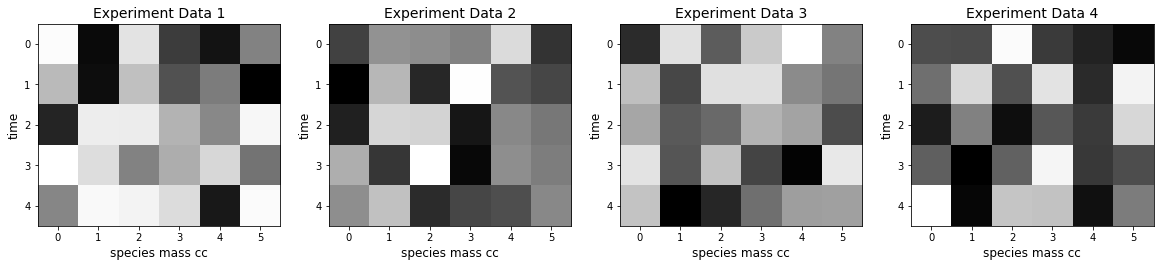

In [48]:
'''Visualize a 3-D Data Block'''

import numpy as np
from matplotlib import pyplot as plt     # import the pyplot function of the matplotlib package
#%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 4] # extend the figure size on screen output

plt.figure(3)   # create a figure placeholder

plt.subplot(1,4,1)   # layout of plots: 1 row 4 columns

plt.imshow(mass_cc[0,:,:], cmap='gray')  # show the "1st" stack

plt.title('Experiment Data 1', fontsize=14)
plt.xlabel('species mass cc', fontsize=12)
plt.ylabel('time', fontsize=12)

plt.subplot(1,4,2)

plt.imshow(mass_cc[1,:,:],cmap='gray') # show the "2nd" stack

plt.title('Experiment Data 2',fontsize=14)
plt.xlabel('species mass cc',fontsize=12)
plt.ylabel('time',fontsize=12)

plt.subplot(1,4,3)

plt.imshow(mass_cc[2,:,:],cmap='gray') # show the "3rd" stack

plt.title('Experiment Data 3',fontsize=14)
plt.xlabel('species mass cc',fontsize=12)
plt.ylabel('time',fontsize=12)

plt.subplot(1,4,4)

plt.imshow(mass_cc[3,:,:],cmap='gray') # show the "4th" stack

plt.title('Experiment Data 4',fontsize=14)
plt.xlabel('species mass cc',fontsize=12)
plt.ylabel('time',fontsize=12)

plt.show()

In [49]:
'''Produce subplots for all matrix slices'''
#help(plt.subplot)

'Produce subplots for all matrix slices'

mass_cc shape = (4, 5, 6)


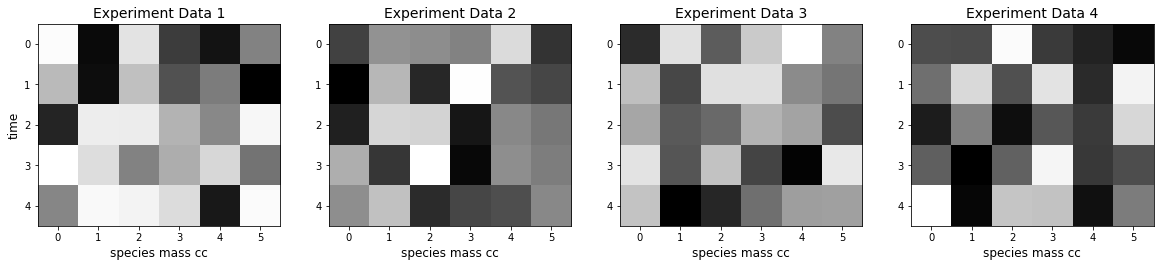

In [50]:
'''Look ahead: automate the Visualization of a 3D Block of Data'''

plt.figure(4)   # create a figure place holder

n_rows = 1                     # number of rows for plotting
n_columns = mass_cc.shape[0]   # number of columns for plotting
print('mass_cc shape =', mass_cc.shape)

# "loop": execution flow control
for i in range(n_rows*n_columns):
    
    plt.subplot(n_rows, n_columns, i+1)      # create subplot
    
    plt.imshow(mass_cc[i,:,:], cmap='gray') # show data in subplot
    
    plt.title('Experiment Data '+str(i+1),fontsize=14)
    plt.xlabel('species mass cc',fontsize=12)
    if i == 0: 
        plt.ylabel('time',fontsize=12)

plt.show()

mass_cc shape = (8, 5, 6)


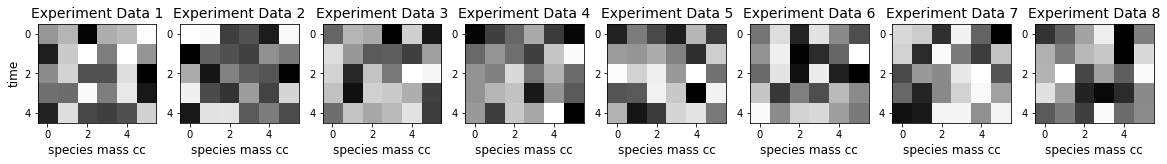

In [51]:
'''More on automation...'''

# Let's try a larger brick data set

mass_cc = np.random.random((8,5,6)) # random number generator in NumPy; pass only one argument; say tuple or list

mass_cc *= 255
mass_cc = mass_cc.astype(int)  # assign int data type

n_rows = 1                    # number of rows for plotting
n_columns = mass_cc.shape[0]   # number of columns for plotting
print('mass_cc shape =', mass_cc.shape)

# "loop": execution flow control
for i in range(n_columns*n_rows):
    
    plt.subplot( n_rows, n_columns, i+1 )      # create subplot
    
    plt.imshow( mass_cc[i,:,:], cmap='gray' ) # show data in subplot
    
    plt.title('Experiment Data '+str(i+1),fontsize=14)
    plt.xlabel('species mass cc',fontsize=12)
    if i == 0:
        plt.ylabel('time',fontsize=12)

plt.show()

In [52]:
#help(plt.imshow)

#### [Color Image as a 3D Array](#toc)<a id="image"></a>

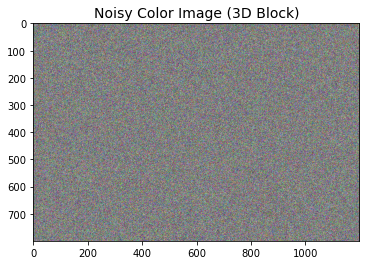

color image type  = <class 'numpy.ndarray'>
color image shape = (800, 1200, 3)
color image size  = 2880000
color image data type  = float64


In [53]:
'''Color Image as a 3D Block Array'''

# Another example of block array data structure

plt.figure(5)       # create a figure place holder

# Note the indices values
color_image = np.random.random((800,1200,3))  # 3 channels: R, G, B

plt.imshow(color_image)
plt.title('Noisy Color Image (3D Block)', fontsize=14)

plt.show()

print('color image type  =', type(color_image))
print('color image shape =', color_image.shape)
print('color image size  =', color_image.size)
print('color image data type  =', color_image.dtype)

**$\Rightarrow$ Color image pixel numbering starts at the upper left corner: 800 x 1200.**

## [Exercising Array Slicing (or Views; see [NB](#nb))](#toc)<a id="views"></a>
Slicing or views are subset of data contained in a given array. Data is accessed using indexing operation, `[]`, in conjunction with the colon operator `:`.

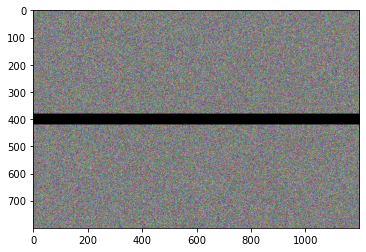

In [54]:
'''Visualize Data Slice in 3D'''

color_image[380:420,:,:] = 0  # horizontal black color stripe

plt.figure(6)
plt.imshow(color_image)
plt.show()

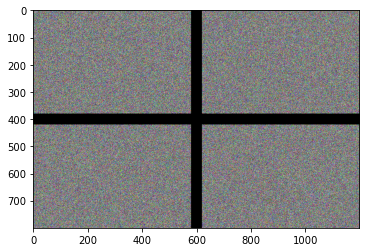

In [55]:
color_image[:,580:620,:] = 0   # vertical black color stripe

plt.figure(6)
plt.imshow(color_image)
plt.show()

**$\Rightarrow$ We just saw how an image representation of a brick (3D) array can be made. The opposite is also possible, that is we can read a color image from file as a brick (3D) array.**

In [56]:
'''Image Reading into a Python Session'''

#help(plt.imread)   # use the matplotlib package

'Image Reading into a Python Session'

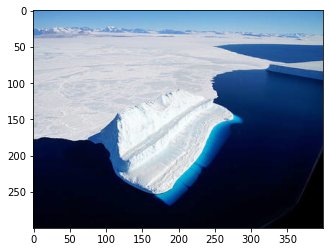

block type = <class 'numpy.ndarray'>
block shape = (300, 400, 3)
block size = 360000
block data type = float32
block data storage [MB] = 1.44


In [58]:
'''3-D Block Visualization of Color Images'''

# Read (using Matplotlib) image from the images/ directory in the chen-3170 repo
#block = plt.imread( 'images/glacier.png', format='png' )

# Read (using Matplotlib) image from the online course repository directory in the chen-3170
#block = plt.imread('https://raw.githubusercontent.com/dpploy/chen-3170/master/notebooks/images/glacier.png', format='png') 
block = plt.imread('images/glacier.png')    
#wrk_copy = np.copy(block) # if a copy is needed to work on the data

plt.imshow(block)
plt.show()

print('block type =',type(block))  # inspect the array shape
print('block shape =',block.shape)  # inspect the array shape
print('block size =',block.size)
print('block data type =',block.dtype)  # inspect the array data type
print('block data storage [MB] =', block.size*4/1000000)

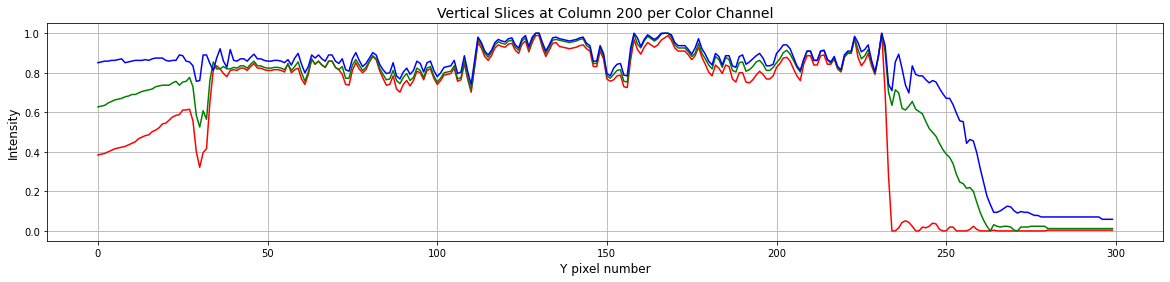

In [59]:
'''Vertical Slice (View)'''

r_vec = block[:,199,0] # slice the red channel (stack) at column 200
g_vec = block[:,199,1] # slice the green channel (stack) at column 200
b_vec = block[:,199,2] # slice the blue channel (stack) at column 200

n_pixels_y = block.shape[0] # get number of pixels in the image's vertical direction

plt.plot(range(n_pixels_y), r_vec,'r', g_vec,'g', b_vec,'b') # plot all three slices

plt.title('Vertical Slices at Column 200 per Color Channel', fontsize=14)
plt.xlabel('Y pixel number', fontsize=12)
plt.ylabel('Intensity', fontsize=12)

plt.grid(True)
plt.show()

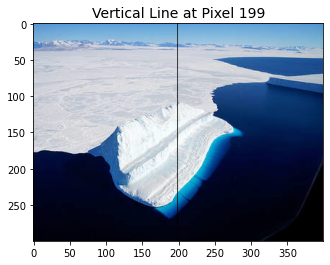

In [60]:
'''Indicate the Vertical Slice Position'''

block_mod = block        # note block_mod shares data with block

block_mod[:,199,:] = 0  # set all channels to zero (black) on the vertical center line

plt.imshow(block_mod)

plt.title('Vertical Line at Pixel 199', fontsize=14)
plt.show()

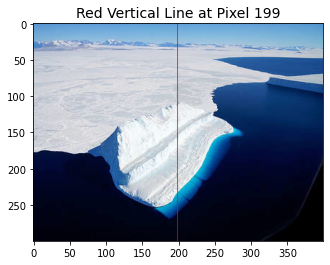

In [61]:
'''Change Color of the Vertical Line'''

block_mod[:,199,0] = 1   # set the red channel to 1
#block_mod[:,199,1] = 0   # set the others to zero (already were)
#block_mod[:,199,2] = 0   # not needed; already zero

plt.imshow(block_mod)
plt.title('Red Vertical Line at Pixel 199',fontsize=14)
plt.show()

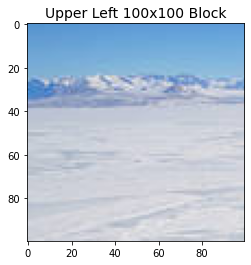

In [62]:
'''Create a "View" of the Data'''

sub_block = block[:100,:100,:]  # upper left 100x100 sub-block of the data

plt.imshow(sub_block)

plt.title('Upper Left 100x100 Block', fontsize=14)
plt.show()

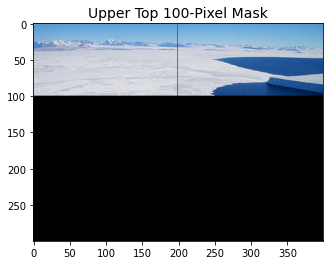

In [63]:
'''Mask the Bottom Data'''

masked = block         # shared data

masked[100:,:,:] = 0   # lower sub-block mask
plt.imshow(masked)

plt.title('Upper Top 100-Pixel Mask', fontsize=14)
plt.show()

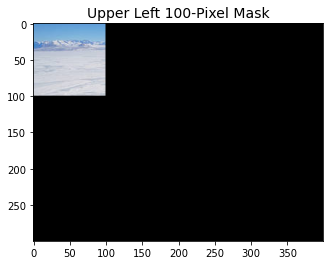

In [64]:
'''Mask the 100 Right Data'''

masked[:,100:,:] = 0     # right sub-block mask
plt.imshow(masked)

plt.title('Upper Left 100-Pixel Mask',fontsize=14)
plt.show()

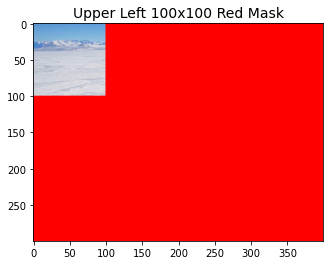

In [65]:
'''Red Mask the 100x100 Data'''

masked = block

masked[100:,:,0] = 1     # lower sub-block mask
plt.imshow(masked)

masked[:,100:,0] = 1     # right sub-block mask
plt.imshow(masked)

plt.title('Upper Left 100x100 Red Mask',fontsize=14)
plt.show()

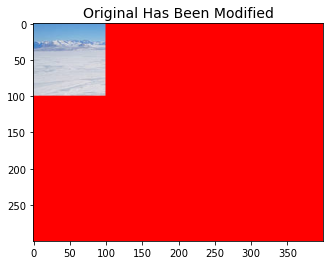

In [66]:
'''View the Original Block'''

plt.imshow(block)  # the image has been modified all along

plt.title('Original Has Been Modified',fontsize=14)
plt.show()

### [Regular Sampling or Filtering](#toc)<a id="regularsampling"></a>

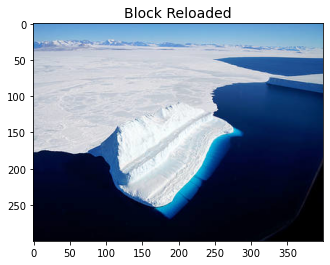

block type = <class 'numpy.ndarray'>
block shape = (300, 400, 3)


In [67]:
'''Reload Block Data'''

# Read (Matplotlib) image from the images/ directory in the chen-3170 repo
block = plt.imread('images/glacier.png',format='png')

plt.imshow(block)  # plot the 3-D data as an image

plt.title('Block Reloaded',fontsize=14)
plt.show()

print('block type =',type(block))  # inspect the array shape
print('block shape =',block.shape)  # inspect the array shape

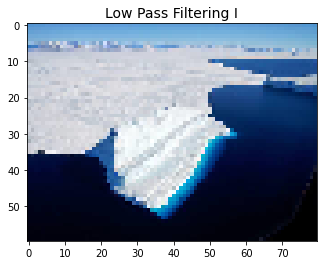

coarse shape = (60, 80, 3)


In [68]:
'''Coarsening the Data; low pass filter'''

coarse = block[::5,::5,:]   # use the step option in the colon operator indexing

plt.imshow(coarse)

plt.title('Low Pass Filtering I', fontsize=14)
plt.show()
print('coarse shape =', coarse.shape)

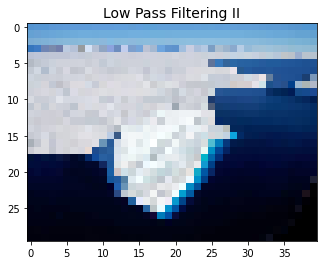

very_coarse = (30, 40, 3)


In [69]:
'''More Coarsening of the Data; low pass filter'''

very_coarse = block[::10,::10,:]

plt.imshow(very_coarse)
plt.title('Low Pass Filtering II',fontsize=14)
plt.show()
print('very_coarse =', very_coarse.shape)

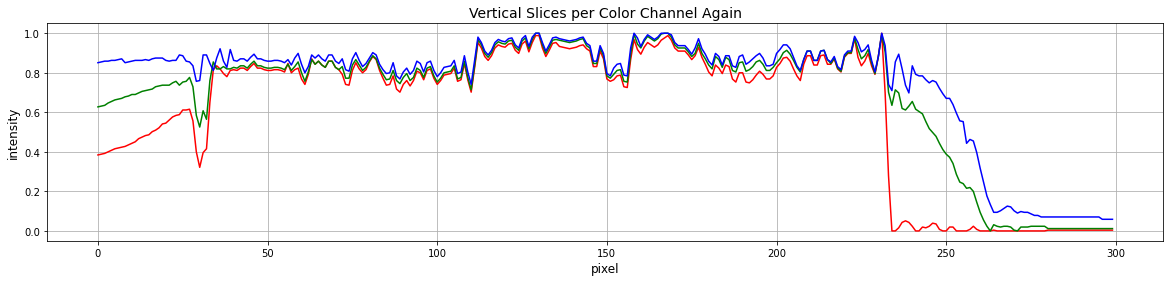

In [70]:
'''Reload the Vertical Slice (View)'''

r_vec = block[:,199,0] # slice the red channel (stack) at column element 200
g_vec = block[:,199,1] # slice the green channel (stack) at column element 200
b_vec = block[:,199,2] # slice the blue channel (stack) at column element 200

plt.plot(range(block.shape[0]), r_vec,'r', g_vec,'g', b_vec,'b') # plot all three slices

plt.title('Vertical Slices per Color Channel Again',fontsize=14)
plt.xlabel('pixel',fontsize=12)
plt.ylabel('intensity',fontsize=12)
plt.grid(True)
plt.show()

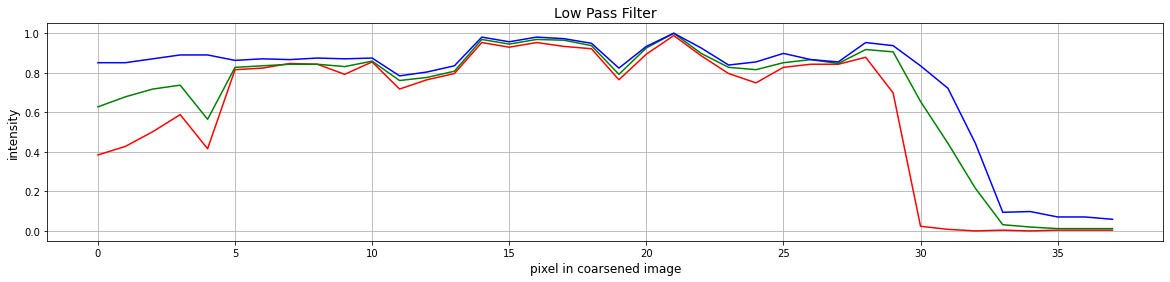

In [71]:
'''Coarsening the Vertical Slice (View)'''

r_vec = block[::8,199,0] # slice the red channel (stack) at column element 200
g_vec = block[::8,199,1] # slice the green channel (stack) at column element 200
b_vec = block[::8,199,2] # slice the blue channel (stack) at column element 200

n_pixels = r_vec.size # length of the coarsened vector

plt.plot(range(n_pixels), r_vec,'r', g_vec,'g', b_vec,'b') # plot all three slices

plt.title('Low Pass Filter',fontsize=14)
plt.xlabel('pixel in coarsened image',fontsize=12)
plt.ylabel('intensity',fontsize=12)

plt.grid(True)
plt.show()

### [Irregular Sampling or Filtering](#toc)<a id="irregularsampling"></a>

Indices used in slicing can be a `list` or a `tuple`. This is particularly useful to access data in an irregular fashion.

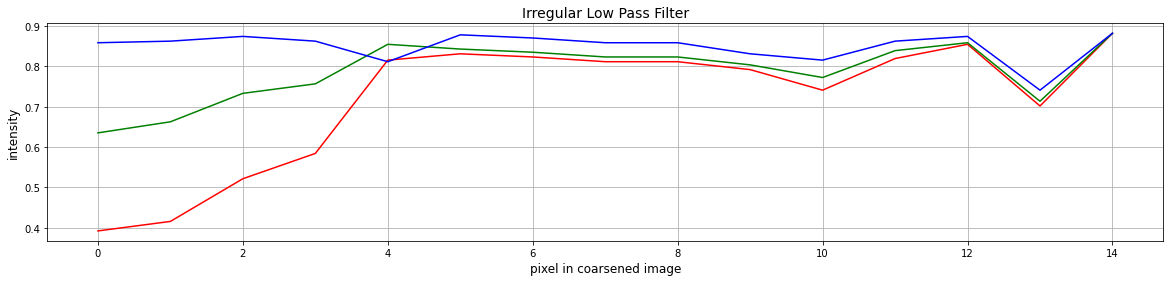

In [72]:
'''Irregular Access to Array Data'''

indices = (2,5,18,23,34,45,47,50,51,62,73,77,80,110,230) # tuple of irregularly spaced indices
#or indices = [2,5,18,23,34,45,47,50,51,62,73,77,80,110,230] # list of irregularly spaced indices
#or indices = np.array([2,5,18,23,34,45,47,50,51,62,73,77,80,110,230]) # vector of irregulary spaced indices

r_vec = block[indices, 199, 0]
g_vec = block[indices, 199, 1]
b_vec = block[indices, 199, 2]

n_pixels = r_vec.size # length of the coarsened vector

plt.plot(range(n_pixels),r_vec,'r',g_vec,'g',b_vec,'b') # plot all three slices

plt.title('Irregular Low Pass Filter',fontsize=14)
plt.xlabel('pixel in coarsened image',fontsize=12)
plt.ylabel('intensity',fontsize=12)

plt.grid(True)
plt.show()

Indices can be created automatically from a search operation, `np.where()`. This is a tricky one!

In [73]:
'''Find the High Red Intensity'''

# Use the where() method from numpy

indices_red = np.where(block[:,199,0] >= 0.85) # high intensity red on the column element 200

print('type indices_red=', type(indices_red))
print('indices_red =', indices_red)

type indices_red= <class 'tuple'>
indices_red = (array([ 63,  65,  68,  69,  76,  80,  81,  82, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 148, 149, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 202, 203, 204, 209, 210, 213, 214, 217, 220, 221, 222, 223,
       224, 226, 227, 230, 231]),)


In [74]:
print(type(indices_red[0]))
indices_red[0]

<class 'numpy.ndarray'>


array([ 63,  65,  68,  69,  76,  80,  81,  82, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 148, 149, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 202, 203, 204, 209, 210, 213, 214, 217, 220, 221, 222, 223,
       224, 226, 227, 230, 231])

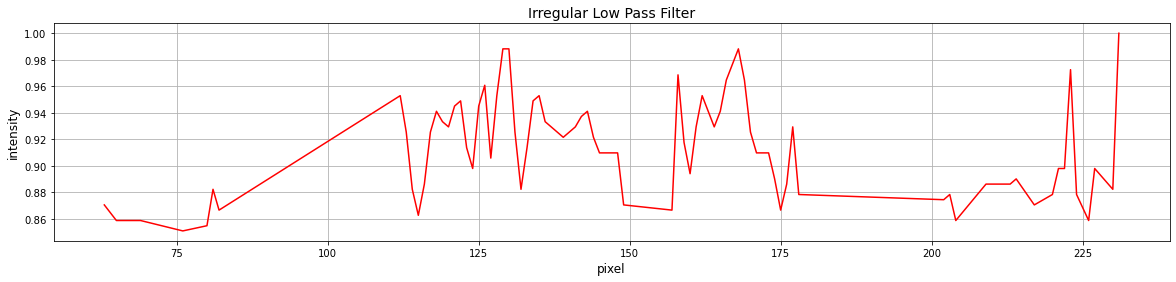

In [75]:
'''Plot the High Red Intensity'''

indices_red_vec = indices_red[0]

plt.plot(indices_red_vec, block[indices_red_vec, 199, 0], 'r')    # plot red

plt.title('Irregular Low Pass Filter',fontsize=14)
plt.xlabel('pixel',fontsize=12)
plt.ylabel('intensity',fontsize=12)

plt.grid(True)
plt.show()

Searching can be done on any `Numpy` array using `np.where()`.

## [Notable Vectors](#toc)<a id="notablevec"></a>

In [76]:
'''Zeros'''

vec = np.zeros(4) # single argument
print('Vector of zeros\n',vec)

Vector of zeros
 [0. 0. 0. 0.]


In [77]:
'''Ones'''

vec = np.ones(4)  # single argument
print('Vector of ones\n',vec)

Vector of ones
 [1. 1. 1. 1.]


In [78]:
'''Any constant'''

vec = np.ones(4) * 12.0  # single argument
print('Vector of 12\n',vec)

Vector of 12
 [12. 12. 12. 12.]


In [79]:
'''Empty (not really)'''

vec = np.empty(4)  # single argument
print('Empty vector \n', vec)

Empty vector 
 [12. 12. 12. 12.]


In [80]:
'''Empty (not really)'''

vec[:] = 3.8  # initialize
print('Initialized vector\n', vec)

Initialized vector
 [3.8 3.8 3.8 3.8]


In [81]:
'''Diagonal Vector'''

mtrx = np.random.random((3,3))
print('Matrix\n',mtrx)

print('')

vec = np.diagonal(mtrx)
print('Diagonal vector\n', vec)

Matrix
 [[0.0931388  0.10360088 0.12701024]
 [0.13403523 0.58206671 0.24230001]
 [0.10368978 0.70663106 0.2600497 ]]

Diagonal vector
 [0.0931388  0.58206671 0.2600497 ]


## [Notable Matrices](#toc)<a id="notablemtrx"></a>

### [Zero matrix](#toc)<a id="zeromtrx"></a>

In [82]:
'''Zeros'''

mtrx = np.zeros((2,3)) # single argument
print('Ones matrix 2x3\n',mtrx)

Ones matrix 2x3
 [[0. 0. 0.]
 [0. 0. 0.]]


### [All ones matrix](#toc)<a id="onesmtrx"></a>

In [83]:
'''Ones'''

mtrx = np.ones((4,3))  # single argument
print('Ones matrix 4x3\n',mtrx)

Ones matrix 4x3
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


### [Any constant matrix](#toc)<a id="ctemtrx"></a>

In [84]:
'''Any Constant'''

mtrx = np.ones((4,3)) * 12.6  # use element by element multiplication
print('Any constant matrix 4x3\n',mtrx)

Any constant matrix 4x3
 [[12.6 12.6 12.6]
 [12.6 12.6 12.6]
 [12.6 12.6 12.6]
 [12.6 12.6 12.6]]


### [Empty matrix](#toc)<a id="emptymtrx"></a>

In [85]:
'''Empty (not really)'''

mtrx = np.empty((6,5))  # single argument
print('Empty mtrx 6x5 \n',mtrx)

mtrx[:,:] = 2.0  # initialize
print('Initialized mtrx 4x5\n', mtrx)

Empty mtrx 6x5 
 [[ 230.72727273  234.0680733   303.19480519  235.64945503  375.66233766]
 [ 240.39360019  448.12987013  235.64945503  520.5974026   215.09149264]
 [ 593.06493506  241.97498191  665.53246753  238.81221847  738.        ]
 [ 234.0680733   810.46753247  234.0680733   882.93506494  222.99840125]
 [ 955.4025974   216.67287436 1027.87012987  235.64945503 1100.33766234]
 [ 240.39360019 1172.80519481  186.62662164 1245.27272727  243.55636364]]
Initialized mtrx 4x5
 [[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]


### [$\Imtrx$: identity matrix](#toc)<a id="identitymtrx"></a>

In [86]:
'''Identity (square)'''

'''one way'''
mtrx = np.eye(4)
print('Identity matrx 4x4 \n',mtrx)

'''another way'''
mtrx = np.diag(np.ones(4))
print('Identity matrix 4x4 \n',mtrx)

Identity matrx 4x4 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Identity matrix 4x4 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [87]:
'''Help on Diagonal usage'''

#help(np.diag)

'Help on Diagonal usage'

### [$\Lmtrx$: lower triangular matrix](#toc)<a id="lmtrx"></a>

A square matrix with all elements **above the main diagonal** equal to zero. That is:

$\Lmtrx = 
\begin{pmatrix}
L_{1,1} & 0        & \dots  & 0     \\
L_{2,1} & L_{2,2} & \dots  & 0     \\
\vdots  & \vdots   & \ddots & \vdots \\
L_{m,1} & L_{m,2} & \dots  & L_{m,m}
\end{pmatrix} 
$.

In [88]:
data = [ [4.5,   0,  0,  0],    # note line continuation
         [0  ,   3,  0,  0],
         [0  , 5.9, 40,  0],
         [7.1, 2.9, 2.1, 1]
       ]

l_mtrx = np.array(data)

print(l_mtrx)

[[ 4.5  0.   0.   0. ]
 [ 0.   3.   0.   0. ]
 [ 0.   5.9 40.   0. ]
 [ 7.1  2.9  2.1  1. ]]


In [89]:
from chen_3170.help import get_triangular_matrix

l_mtrx = get_triangular_matrix('lower', 5)
print(l_mtrx)

[[0.6418562  0.         0.         0.         0.        ]
 [0.90674785 0.15165263 0.         0.         0.        ]
 [0.43184417 0.23096314 0.67240126 0.         0.        ]
 [0.92693005 0.35856376 0.03016955 0.58858598 0.        ]
 [0.72805357 0.42314329 0.53805421 0.72407561 0.56741672]]


In [90]:
#help(get_triangular_matrix)

In [91]:
#!cat chen_3170/help.py

### [$\Umtrx$: upper triangular matrix](#toc)<a id="umtrx"></a>

A square matrix with all elements **below the main diagonal** equal to zero.

$\Umtrx = 
\begin{pmatrix}
U_{1,1} & U_{1,2} & \dots  & U_{1,m} \\
0       & U_{2,2} & \dots  & U_{2,m} \\
\vdots  & \vdots  & \ddots & \vdots \\
0       & 0       & \dots  & U_{m,m}
\end{pmatrix} 
$.

In [92]:
u_mtrx = get_triangular_matrix('upper', 5)
print(u_mtrx)

[[5.71900320e-01 9.42585759e-01 3.23936897e-01 1.45029922e-01
  5.63398927e-01]
 [0.00000000e+00 4.65530898e-01 2.80228130e-01 6.14124966e-01
  2.08411103e-01]
 [0.00000000e+00 0.00000000e+00 4.39866705e-04 9.55539796e-01
  7.02360845e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.30628600e-01
  9.98867593e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.16695648e-03]]
